# the objective of the compettion was to predict lithology from existing labelled data.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as colors

In [2]:
df = pd.read_csv("C:/Users/AHMED/Documents/geology/andymcdge/Petrophysics-Python-Series-master/Petrophysics-Python-Series-master/Data/xeek_train_subset.csv")


In [3]:
df

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528000,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680000,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832000,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984000,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136000,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133193,16/2-16,2207.310396,476770.12500,6523587.5,-2180.926514,ROTLIEGENDES GP.,Skagerrak Fm.,8.698007,NaN,5.382444,...,22.291321,NaN,NaN,0.107520,NaN,NaN,NaN,NaN,30000,2.0
133194,16/2-16,2207.462396,476770.15625,6523587.5,-2181.078613,ROTLIEGENDES GP.,Skagerrak Fm.,8.721210,NaN,5.651109,...,22.230320,NaN,NaN,0.101821,NaN,NaN,NaN,NaN,30000,2.0
133195,16/2-16,2207.614396,476770.15625,6523587.5,-2181.230469,ROTLIEGENDES GP.,Skagerrak Fm.,8.739136,NaN,5.870602,...,22.388054,NaN,NaN,0.097832,NaN,NaN,NaN,NaN,30000,2.0
133196,16/2-16,2207.766396,476770.15625,6523587.5,-2181.382324,ROTLIEGENDES GP.,Skagerrak Fm.,8.749738,NaN,5.756996,...,23.331690,NaN,NaN,0.092334,NaN,NaN,NaN,NaN,30000,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133198 entries, 0 to 133197
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               133198 non-null  object 
 1   DEPTH_MD                           133198 non-null  float64
 2   X_LOC                              125805 non-null  float64
 3   Y_LOC                              125805 non-null  float64
 4   Z_LOC                              125805 non-null  float64
 5   GROUP                              133198 non-null  object 
 6   FORMATION                          111632 non-null  object 
 7   CALI                               133006 non-null  float64
 8   RSHA                               62039 non-null   float64
 9   RMED                               125556 non-null  float64
 10  RDEP                               125805 non-null  float64
 11  RHOB                               1080

In [10]:
#We don't need all of the columns for this example, so we will take a copy of the dataframe with the required logging measurements, including the well name and the depth curve.
workingdf = df[["WELL", "DEPTH_MD", "RDEP", "RHOB", "GR", "NPHI", "PEF", "DTC", "FORCE_2020_LITHOFACIES_LITHOLOGY"]].copy()


In [11]:
#rename the FORCE_2020_LITHOFACIES_LITHOLOGY column to something simpler like FACIES.
workingdf.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'FACIES'}, inplace=True)


In [7]:
workingdf


,WELL,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES
0,15/9-13,494.528000,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,65000
1,15/9-13,494.680000,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,65000
2,15/9-13,494.832000,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,65000
3,15/9-13,494.984000,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,65000
4,15/9-13,495.136000,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,65000
...,...,...,...,...,...,...,...,...,...
133193,16/2-16,2207.310396,5.339929,2.531374,127.456139,NaN,3.607062,NaN,30000
133194,16/2-16,2207.462396,5.689734,2.526128,128.403305,NaN,3.609151,NaN,30000
133195,16/2-16,2207.614396,5.496074,2.528934,127.829262,NaN,3.594580,NaN,30000
133196,16/2-16,2207.766396,5.345353,2.527052,126.552277,NaN,3.534883,NaN,30000


In [12]:
# creating a dictionary for the string representations of the numbers.
lithology_numbers = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [13]:
#The second dictionary is simplifying the lithology number to range from 1 to 12 instead of the large range of numbers used in the original data.
simple_lithology_numbers = {30000: 1,
                 65030: 2,
                 65000: 3,
                 80000: 4,
                 74000: 5,
                 70000: 6,
                 70032: 7,
                 88000: 8,
                 86000: 9,
                 99000: 10,
                 90000: 11,
                 93000: 12}

In [15]:
#create new column in dataframe and then we assign the mapped values using the .map() method.
workingdf['LITH'] = workingdf['FACIES'].map(lithology_numbers)


In [16]:
#create new column in dataframe and then we assign the mapped values using the .map() method.
workingdf['LITH_SI'] = workingdf['FACIES'].map(simple_lithology_numbers)


In [17]:
workingdf

,WELL,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES,LITH_SI,LITH
0,15/9-13,494.528000,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,65000,3,Shale
1,15/9-13,494.680000,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,65000,3,Shale
2,15/9-13,494.832000,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,65000,3,Shale
3,15/9-13,494.984000,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,65000,3,Shale
4,15/9-13,495.136000,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,65000,3,Shale
...,...,...,...,...,...,...,...,...,...,...,...
133193,16/2-16,2207.310396,5.339929,2.531374,127.456139,NaN,3.607062,NaN,30000,1,Sandstone
133194,16/2-16,2207.462396,5.689734,2.526128,128.403305,NaN,3.609151,NaN,30000,1,Sandstone
133195,16/2-16,2207.614396,5.496074,2.528934,127.829262,NaN,3.594580,NaN,30000,1,Sandstone
133196,16/2-16,2207.766396,5.345353,2.527052,126.552277,NaN,3.534883,NaN,30000,1,Sandstone


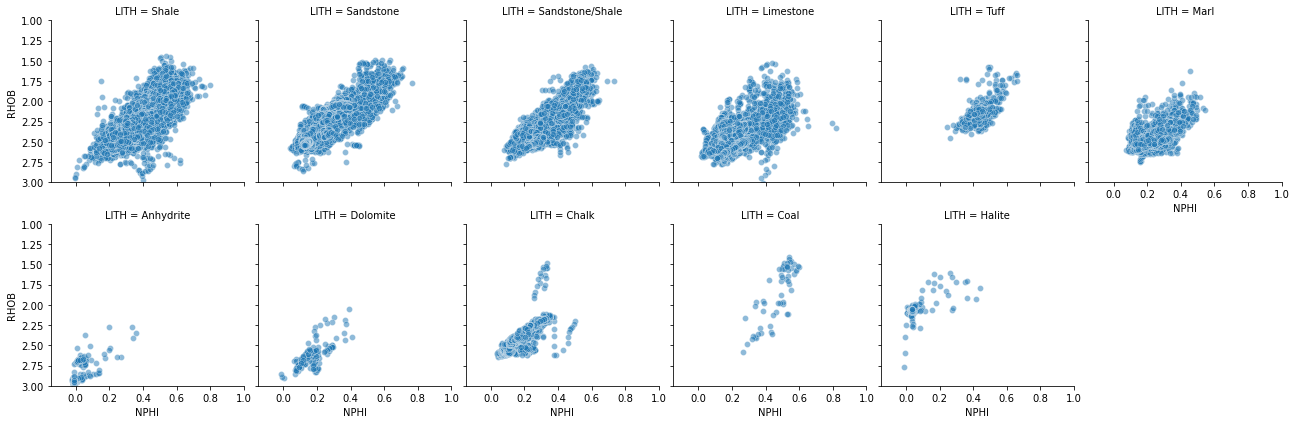

In [21]:
#sns.FacetGrid is a class in the seaborn library that is used for creating multi-plot grids, 
#where each subplot is a plot of the same kind ,(e.g. scatter plot, line plot, histogram) but with different data subsets.
g = sns.FacetGrid(workingdf, col='LITH', col_wrap=6)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))

In [32]:
def create_plot(wellname, dataframe, curves_to_plot, depth_curve, log_curves=[], facies_curves=[]):
   
    # Count the number of tracks we need
    num_tracks = len(curves_to_plot)
    
    facies_color = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D', 'red','black', 'blue']
    
               
    # Setup the figure and axes
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    # Create a super title for the entire plot
    fig.suptitle(wellname, fontsize=20, y=1.05)
    
    # Loop through each curve in curves_to_plot and create a track with that data
    for i, curve in enumerate(curves_to_plot):
        if curve in facies_curves:
            cmap_facies = colors.ListedColormap(facies_color[0:dataframe[curve].max()], 'indexed')
            
            cluster=np.repeat(np.expand_dims(dataframe[curve].values,1), 100, 1)
            im=ax[i].imshow(cluster, interpolation='none', cmap=cmap_facies, aspect='auto',vmin=dataframe[curve].min(),vmax=dataframe[curve].max(), 
                            extent=[0,20, depth_curve.max(), depth_curve.min()])
        else:
            ax[i].plot(dataframe[curve], depth_curve)
                # Setup a few plot cosmetics
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')
        
        # We want to pass in the deepest depth first, so we are displaying the data 
        # from shallow to deep
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())
        
        # Only set the y-label for the first track. Hide it for the rest
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
            
        # Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
        
    plt.tight_layout()
    plt.show()
    
    return cmap_facies


# Splitting Data by Well Function
The second method we will create will be used to split up our dataframe by wells. This is done using the groupby function, and will allow us to store each dataframe within a list for easy access later.

In [40]:
def well_splitter(dataframe, groupby_column):
    grouped = dataframe.groupby(groupby_column)
    
    # Create empty lists
    wells_as_dfs = []
    wells_wellnames = []

    #Split up the data by well
    for well, data in grouped:
        wells_as_dfs.append(data)
        wells_wellnames.append(well)

    print('index  wellname')
    for i, name in enumerate(wells_wellnames):
        print(f'{i}      {name}')
    
    return wells_as_dfs, wells_wellnames

In [41]:
grouped_wells, grouped_names = well_splitter(workingdf, 'WELL')

index  wellname
0      15/9-13
1      15/9-15
2      15/9-17
3      16/1-2
4      16/1-6 A
5      16/10-1
6      16/10-2
7      16/10-3
8      16/10-5
9      16/11-1 ST3
10      16/2-11 A
11      16/2-16


# Clustering - Unsupervised
In this section, we are going to setup our clustering models and run them on our dataset.

First we will import our clustering models from the sklearn library.

In [42]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


# Finding the Optimum Number of Clusters by elbow method

In [45]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()
    

In [46]:
# For clustering to work, we need to remove any missing values. This is achieved using the dropna() function.

workingdf.dropna(inplace=True)


In [47]:
workingdf.describe()

,DEPTH_MD,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES,LITH_SI
count,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000,82732.000000
mean,2026.091770,1.949349,2.216580,67.769272,0.364413,4.617041,116.211408,62691.493352,3.355848
std,622.447842,16.295946,0.225473,36.640160,0.139758,3.937549,30.752148,13172.216175,1.671553
min,705.550396,0.123068,1.412190,5.782680,-0.005300,1.126667,7.415132,30000.000000,1.000000
25%,1516.358446,0.737603,2.034906,44.220089,0.243001,3.140069,86.331350,65000.000000,3.000000
50%,2010.897600,1.098597,2.178304,64.679111,0.403345,4.012710,125.787430,65000.000000,3.000000
75%,2569.647947,1.771478,2.421446,87.443424,0.484445,5.247028,144.037128,65030.000000,3.000000
max,3198.760000,1856.935059,3.005321,804.298950,0.800262,288.103638,230.432953,99000.000000,11.000000


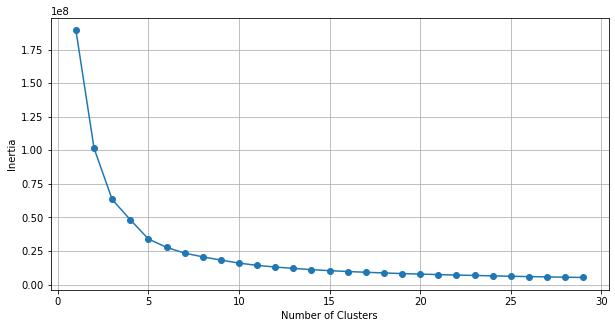

In [49]:
optimise_k_means(workingdf[['GR', 'RHOB', 'NPHI', 'DTC']], 30)

# Fitting the Clustering Models

In [58]:
# Create the KMeans model with the selected number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the model to our dataset
kmeans.fit(workingdf[['GR', 'RHOB', 'NPHI', 'DTC']])

# Assign the data back to the workingdf
workingdf['KMeans'] = kmeans.labels_

In [59]:
#Create the gmm model with the selected number of clusters/components
gmm = GaussianMixture(n_components=5)

# Fit the model to our dataset
gmm.fit(workingdf[['GR', 'RHOB', 'NPHI', 'DTC']])

# Predict the labels
gmm_labels = gmm.predict(workingdf[['GR', 'RHOB', 'NPHI', 'DTC']])

# Assign the labels back to the workingdf
workingdf['GMM'] = gmm_labels

# Plotting the Results

In [60]:
dfs_wells, wellnames = well_splitter(workingdf, 'WELL')

index  wellname
0      15/9-13
1      15/9-15
2      15/9-17
3      16/1-6 A
4      16/10-1
5      16/10-2
6      16/10-3
7      16/10-5
8      16/2-11 A
9      16/2-16


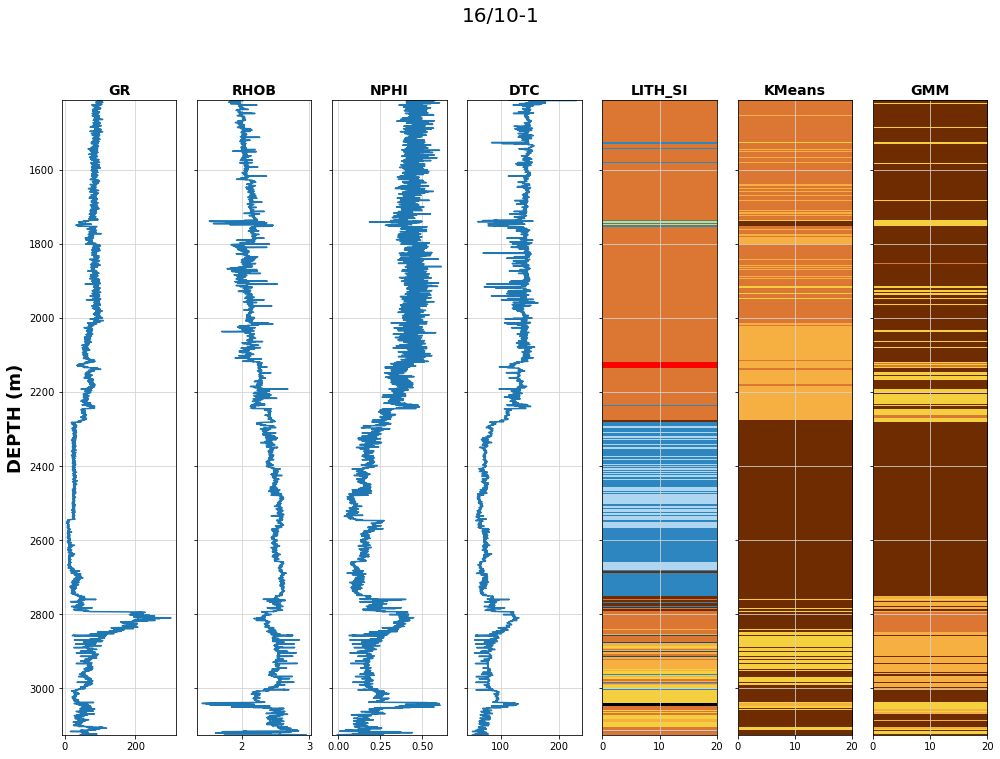

In [61]:
# Setup the curves to plot
curves_to_plot = ['GR', 'RHOB', 'NPHI', 'DTC',  'LITH_SI', 'KMeans','GMM']
logarithmic_curves = ['RDEP']
facies_curve=['KMeans','GMM', 'LITH_SI']

# Create plot by passing in the relevant well index number
well = 4
cmap_facies = create_plot(wellnames[well], 
            dfs_wells[well], 
            curves_to_plot, 
            dfs_wells[well]['DEPTH_MD'], 
            logarithmic_curves, facies_curve)

# Viewing Results on Scatterplots / Crossplots

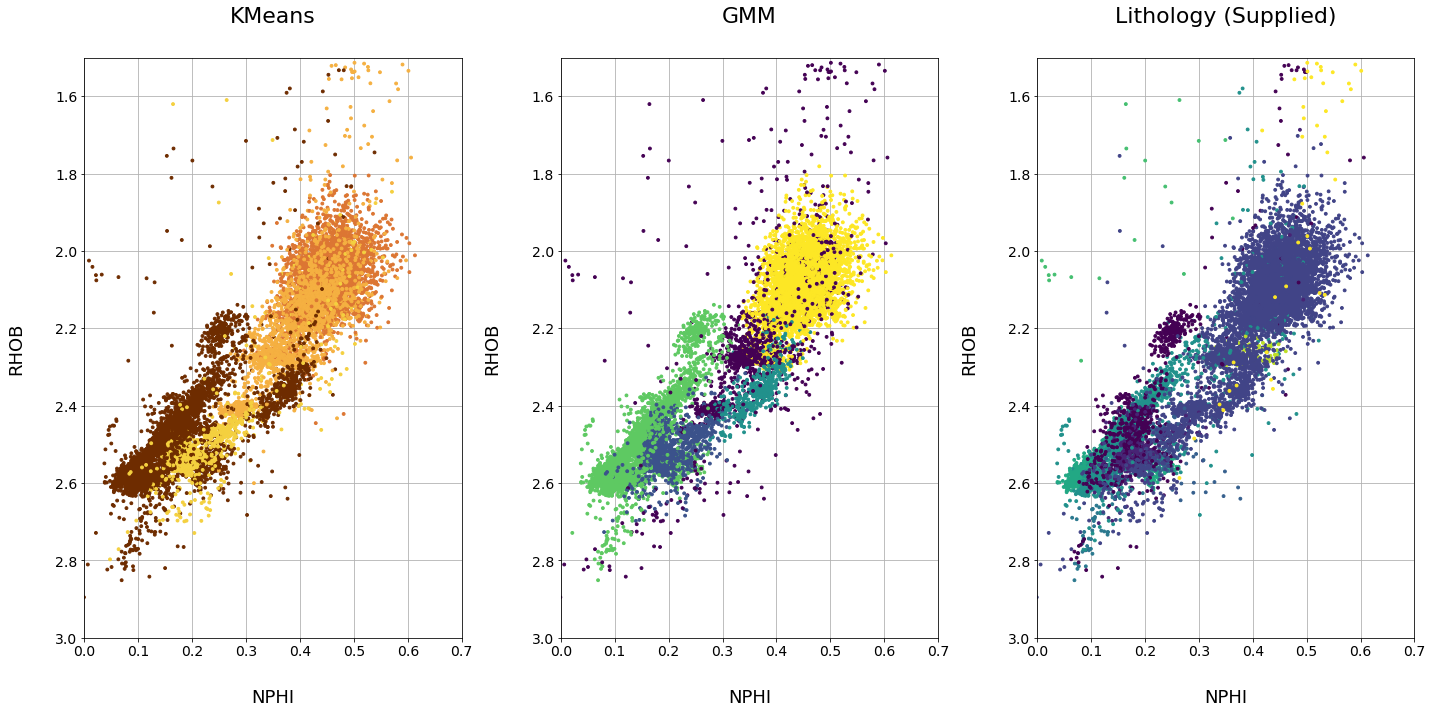

In [62]:
fig, ax = plt.subplots(figsize=(20,10))
ax1 = plt.subplot2grid((1,3), (0,0))

ax1.scatter(dfs_wells[well]['NPHI'], dfs_wells[well]['RHOB'], c=dfs_wells[well]['KMeans'], s=8, cmap=cmap_facies)
ax1.set_title('KMeans', fontsize=22, y=1.05)

ax2 = plt.subplot2grid((1,3), (0,1))
ax2.scatter(dfs_wells[well]['NPHI'], dfs_wells[well]['RHOB'], c=dfs_wells[well]['GMM'], s=8)
ax2.set_title('GMM', fontsize=22, y=1.05)


ax3 = plt.subplot2grid((1,3), (0,2))
ax3.scatter(dfs_wells[well]['NPHI'], dfs_wells[well]['RHOB'], c=dfs_wells[well]['LITH_SI'], s=8)
ax3.set_title('Lithology (Supplied)', fontsize=22, y=1.05)

for ax in [ax1, ax2, ax3]:
    ax.set_xlim(0, 0.7)
    ax.set_ylim(3, 1.5)
    ax.set_ylabel('RHOB', fontsize=18, labelpad=30)
    ax.set_xlabel('NPHI', fontsize=18, labelpad=30)
    ax.grid()
    ax.set_axisbelow(True)

    ax.tick_params(axis='both', labelsize=14)
plt.tight_layout()

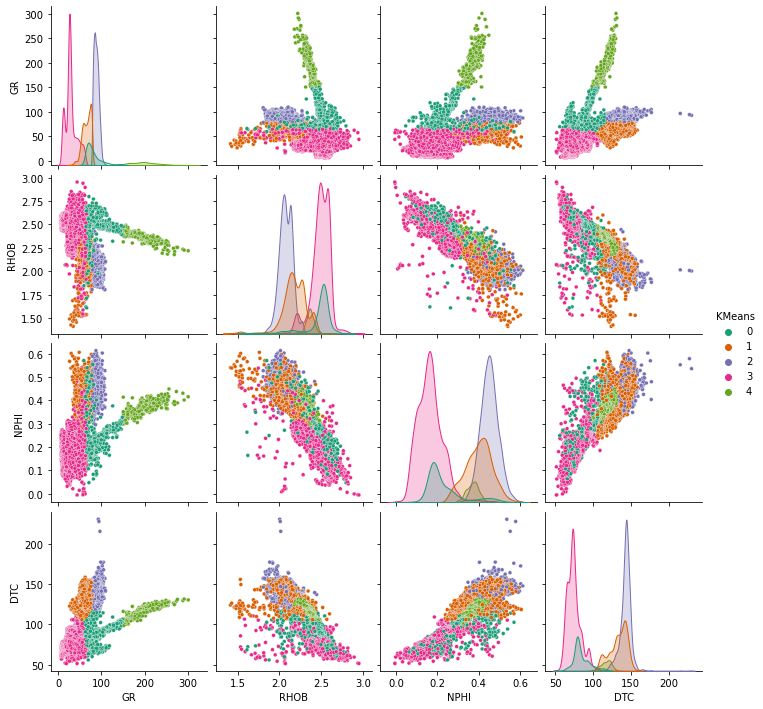

In [63]:
# Viewing Results on a Pairplot
sns.pairplot(dfs_wells[4], vars=['GR', 'RHOB','NPHI', 'DTC'], hue='KMeans', palette='Dark2',
             diag_kind='kde', plot_kws = {'s': 15, 'marker':'o', 'alpha':1})